# Data and Sampling Distributions

A popular misconception holds that the era of big data means the end of a need for sampling. In fact, the proliferation of data of varying quality and relevance reinforces the need for sampling as a tool to work efficiently with a variety of data and to minimize bias. Even in a big data project, predictive models are typically developed and piloted with samples. Samples are also used in tests of various sorts.

In general, data scientists need not worry about the theoretical nature of the population, and instead should focus on the sampling procedures and the data at hand. There are some notable exceptions. Sometimes data is generated from a physical process that can be modeled. The simplest example is flipping a coin: this follows a binomial distribution. Any real-life binomial situation (buy or don’t buy, fraud or no fraud, click or don’t click) can be modeled effectively by a coin (with modified probability of landing heads, of course). In these cases, we can gain additional insight by using our understanding of the population.

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# define paths to datasets

DATA = Path().resolve() / 'data' 

LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

<bound method _AxesBase.set_position of <AxesSubplot:>>

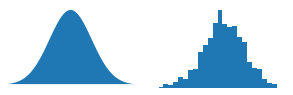

In [3]:
# population versus sampling

np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position

## 1. Random Sampling and Sample Bias

Key terms:

Sample: A subset from a larger data set.  
Population: The larger data set or idea of a data set.  
N(n): The size of the population (sample).  
Random sampling: Drawing elements into a sample at random.  
Stratified sampling: Dividing the population into strata and randomly sampling from each strata.  
Simple random sample: The sample that results from random sampling without stratifying the population.  
Sample bias: A sample that misrepresents the population.  

_Random sampling_ is a process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw. The sample that results is called a _simple random sample_. Sampling can be done _with replacement_, in which observations are put back in the population after each draw for possible future reselection. Or it can be done _without replacement_, in which case observations, once selected, are unavailable for future draws.

Data quality often matters more than data quantity when making an estimate or a model based on a sample. Data quality in data science involves completeness, consistency of format, cleanliness, and accuracy of individual data points. Statistics adds the notion of _representativeness_.

### Bias

Sample bias: the sample was different in some meaningful _nonrandom_ way from the larger population it was meant to represent. The term nonrandom is important
— hardly any sample, including random samples, will be exactly representative of the population. Sample bias occurs when the difference is meaningful, and can be expected to continue for other samples drawn in the same way as the first.

Statistical bias refers to measurement or sampling errors that are systematic and produced by the measurement or sampling process. _An important distinction should be made between errors due to random chance, and errors due to bias._

Bias comes in different forms, and may be observable or invisible. When a result does suggest bias (e.g., by reference to a benchmark or actual values), it is often an indicator that a statistical or machine learning model has been misspecified, or an important variable left out.

### Random Selection

To avoid sample bias, there are now a variety of methods to achieve representativeness, but at the heart of all of them lies _random sampling_.

### Size vs Quality: when does size matter?

In the era of big data, it is sometimes surprising that smaller is better. Time and effort spent on random sampling not only reduce bias, but also allow greater attention to data exploration and data quality. For example, missing data and outliers may contain useful information. It might be prohibitively expensive to track down missing values or evaluate outliers in millions of records, but doing so in a sample of several thousand records may be feasible.

When are massive amounts of data needed? The classic scenario for the value of big data is when the data is not only big, but sparse as well.

### Sample Mean versus Population Mean

The symbol x-bar is used to represent the mean of a sample from a population, whereas mu is used to represent the mean of a population. Why make the distinction? Information about samples is observed, and information about large populations is often inferred from smaller samples. Statisticians like to keep the two things separate in the symbology.

## 2. Selection Bias

Selection bias refers to the practice of selectively choosing data — consciously or unconsciously — in a way that that leads to a conclusion that is misleading or ephemeral.

Key terms:

Bias: Systematic error.  
Data snooping: Extensive hunting through data in search of something interesting.  
Vast search effect: Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

The difference between a phenomenon that you verify when you test a hypothesis using an experiment, versus a phenomenon that you discover by perusing available data can be illuminated with the following thought experiment. Imagine that someone tells you she can flip a coin and have it land heads on the next 10 tosses. You challenge her (the equivalent of an experiment), and she proceeds to toss it 10 times, all landing heads. Clearly you ascribe some special talent to her — the probability that 10 coin tosses will land heads just by chance is 1 in 1,000. Now imagine that the announcer at a sports stadium asks the 20,000 people in attendance each to toss a coin 10 times, and report to an usher if they get 10 heads in a row. The chance that somebody in the stadium will get 10 heads is extremely high (more than 99% — it’s 1 minus the probability that nobody gets 10 heads). Clearly, selecting, after the fact, the person (or persons) who gets 10 heads at the stadium does not indicate they have any special talent — it’s most likely luck.

If you repeatedly run different models and ask different questions with a large data set, you are bound to find something interesting. Is the result you found truly something
interesting, or is it the chance outlier? This can be solved using a permutation test.

### Regression to the Mean

Regression to the mean refers to a phenomenon involving successive measurements on a given variable: extreme observations tend to be followed by more central ones. Regression to the mean is a consequence of a particular form of selection bias. When we select the rookie with the best performance, skill and good luck are probably contributing. In his next season, the skill will still be there but, in most cases, the luck will not, so his performance will decline — it will regress.

Key ideas:

Specifying a hypothesis, then collecting data following randomization and random sampling principles, ensures against bias.  
All other forms of data analysis run the risk of bias resulting from the data collection/analysis process (repeated running of models in data mining, data snooping in research, and after-the-fact selection of interesting events).

## 3. Sampling Distribution of a Statistic

Key terms:

Sample statistic: A metric calculated for a sample of data drawn from a larger population.  
Data distribution: The frequency distribution of individual values in a data set.  
Sampling distribution: The frequency distribution of a sample statistic over many samples or resamples.  
Central limit theorem: The tendency of the sampling distribution to take on a normal shape as sample size rises.  
Standard error: The variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which, by itself, refers to variability of individual data values).  


The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution of the data itself. The larger the sample that the statistic is based on, the more this is true. Also, the larger the sample, the narrower the distribution of the sample statistic.

In [4]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

,income,type
40292,63000.0,Data
38959,92000.0,Data
17361,134000.0,Data
33996,52000.0,Data
26491,43000.0,Data


In [8]:
results.shape

(3000, 2)

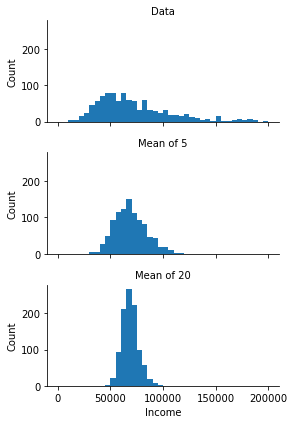

In [5]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

The central limit theorem allows normal-approximation formulas like the t-distribution to be used in calculating sampling distributions for inference — that is, confidence intervals and hypothesis tests. Since formal hypothesis tests and confidence intervals play a small role in data science, and the bootstrap is available in any case, the central limit theorem is not so central in the practice of data science.

### Standard Error

The standard error is a single metric that sums up the variability in the sampling distribution for a statistic. The validity of the standard error formula arises from the central limit theorem. In fact, you don’t need to rely on the central limit theorem to understand standard error. Consider the following approach to measure standard error:

1. Collect a number of brand new samples from the population.
2. For each new sample, calculate the statistic (e.g., mean).
3. Calculate the standard deviation of the statistics computed in step 2; use this as your estimate of standard error.

In practice, this approach of collecting new samples to estimate the standard error is typically not feasible. Fortunately, it turns out that it is not necessary to draw brand new samples; instead, you can use bootstrap resamples. In modern statistics, the bootstrap has become the standard way to to estimate standard error. It can be used for virtually any statistic and does not rely on the central limit theorem or other distributional assumptions.

Key ideas:

The frequency distribution of a sample statistic tells us how that metric would turn out differently from sample to sample.  
This sampling distribution can be estimated via the bootstrap, or via formulas that rely on the central limit theorem.  
A key metric that sums up the variability of a sample statistic is its standard error.

### The Bootstrap

One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample. This procedure is called the bootstrap. 

Conceptually, you can imagine the bootstrap as replicating the original sample thousands or millions of times so that you have a hypothetical population that embodies all the knowledge from your original sample (it’s just larger). You can then draw samples from this hypothetical population for the purpose of estimating a sampling distribution.

Key terms:

Bootstrap sample: A sample taken with replacement from an observed data set.  
Resampling: The process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures.

In practice, it is not necessary to actually replicate the sample a huge number of times. We simply replace each observation after each draw; that is, we sample with replacement. In this way we effectively create an infinite population in which the probability of an element being drawn remains unchanged from draw to draw. The algorithm for a bootstrap resampling of the mean is as follows, for a sample of size n:

1. Draw a sample value, record, replace it.
2. Repeat n times.
3. Record the mean of the n resampled values.
4. Repeat steps 1–3 R times.
5. Use the R results to:
a. Calculate their standard deviation (this estimates sample mean standard error).
b. Produce a histogram or boxplot.
c. Find a confidence interval.

The bootstrap does not compensate for a small sample size; it does not create new data, nor does it fill in holes in an existing data set. It merely informs us about how lots of additional samples would behave when drawn from a population like our original sample.

### Resampling vs Bootstrapping

Sometimes the term resampling is used synonymously with the term bootstrapping, as just outlined. More often, the term resampling also includes permutation procedures, where multiple samples are combined and the sampling may be done without replacement. In any case, the term bootstrap always implies sampling with replacement from an observed dataset.

Key ideas:

The bootstrap (sampling with replacement from a data set) is a powerful tool for assessing the variability of a sample statistic.  
The bootstrap can be applied in similar fashion in a wide variety of circumstances, without extensive study of mathematical approximations to sampling distributions.  
It also allows us to estimate sampling distributions for statistics where no mathematical approximation has been developed.  
When applied to predictive models, aggregating multiple bootstrap sample predictions (bagging) outperforms the use of a single model.  

### Confidence Intervals

Frequency tables, histograms, boxplots, and standard errors are all ways to understand the potential error in a sample estimate. Confidence intervals are another.

Key terms:  
Confidence level: The percentage of confidence intervals, constructed in the same way from the same population, expected to contain the statistic of interest.  
Interval endpoints: The top and bottom of the confidence interval.

One way to think of a 90% confidence interval is as follows: it is the interval that encloses the central 90% of the bootstrap sampling distribution of a sample statistic. More generally, an x% confidence interval around a sample estimate should, on average, contain similar sample estimates x% of the time (when a similar sampling procedure is followed).

Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:
1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim [(1 – [x/100]) / 2]% of the R resample results from either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.

68760.51844
55734.1


Text(0, 0.5, 'Counts')

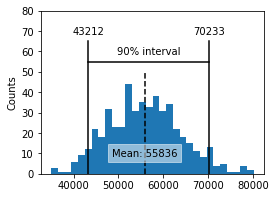

In [19]:
# Figure 2-9 shows a 90% confidence interval for the mean annual income of loan applicants, based on a sample of 20 for which the mean was $55836.

print(loans_income.mean())
np.random.seed(seed=3)  

# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):  # R = 500
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

## 4. Normal Distribution

Key items:

Error: The difference between a data point and a predicted or average value.  
Standardize: Subtract the mean and divide by the standard deviation.  
z-score: The result of standardizing an individual data point.  
Standard normal: A normal distribution with mean = 0 and standard deviation = 1.  
QQ-Plot: A plot to visualize how close a sample distribution is to a normal distribution.  

In a normal distribution, 68% of the data lies within one standard deviation of the mean, and 95% lies within two standard deviations. A standard normal distribution is one in which the units on the x-axis are expressed in terms of standard deviations away from the mean. To compare data to a standard normal distribution, you subtract the mean then divide by the
standard deviation; this is also called normalization or standardization. The transformed value is termed a z-score, and the normal distribution is sometimes called the z-distribution.

A QQ-Plot is used to visually determine how close a sample is to the normal
distribution. The QQ-Plot orders the z-scores from low to high, and plots each
value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal
distribution for that value’s rank. (A good explanation can be found here https://data.library.virginia.edu/understanding-q-q-plots/) 

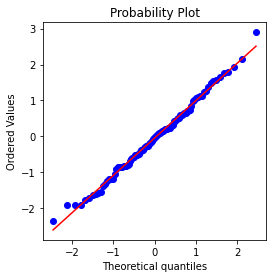

In [23]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.show()

Converting data to z-scores (i.e., standardizing or normalizing the data) does not make the data
normally distributed. It just puts the data on the same scale as the standard normal distribution,
often for comparison purposes.

Key ideas:

The normal distribution was essential to the historical development of statistics, as it permitted
mathematical approximation of uncertainty and variability.  
While raw data is typically not normally distributed, errors often are, as are averages and totals in
large samples.  
To convert data to z-scores, you subtract the mean of the data and divide by the standard deviation;
you can then compare the data to a normal distribution.

## 5. Long-Tailed Distributions

Despite the importance of the normal distribution historically in statistics, and in
contrast to what the name would suggest, data is generally not normally
distributed.

While the normal distribution is often appropriate and useful with respect to the
distribution of errors and sample statistics, it typically does not characterize the
distribution of raw data. Sometimes, the distribution is highly skewed. Both symmetric and asymmetric distributions may have long
tails. The tails of a distribution correspond to the extreme values (small and
large).

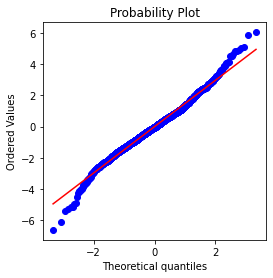

In [24]:
# QQ-Plot for the daily stock returns for Netflix (NFLX).

sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.show()

In contrast to Figure 2-11, the points are far below the line for low values and far
above the line for high values. This means that we are much more likely to
observe extreme values than would be expected if the data had a normal
distribution. Figure 2-12 shows another common phenomena: the points are close
to the line for the data within one standard deviation of the mean. Tukey refers to
this phenomenon as data being “normal in the middle,” but having much longer
tails.

KEY IDEAS:

Most data is not normally distributed.  
Assuming a normal distribution can lead to underestimation of extreme events (“black swans”).

## 6. Student's t-Distribution

The t-distribution is a normally shaped distribution, but a bit thicker and longer
on the tails. It is used extensively in depicting distributions of sample statistics.
Distributions of sample means are typically shaped like a t-distribution, and there
is a family of t-distributions that differ depending on how large the sample is. The
larger the sample, the more normally shaped the t-distribution becomes.

KEY IDEAS

The t-distribution is actually a family of distributions resembling the normal distribution, but with
thicker tails.  
It is widely used as a reference basis for the distribution of sample means, differerences between
two sample means, regression parameters, and more.

What do data scientists need to know about the t-distribution and the central limit theorem? Not a
whole lot. These distributions are used in classical statistical inference, but are not as central to
the purposes of data science. Understanding and quantifying uncertainty and variation are
important to data scientists, but empirical bootstrap sampling can answer most questions about
sampling error. However, data scientists will routinely encounter t-statistics in output from
statistical software and statistical procedures in R, for example in A-B tests and regressions, so
familiarity with its purpose is helpful.

## 7. Binomial Distribution

KEY TERMS FOR BINOMIAL DISTRIBUTION

Trial: An event with a discrete outcome (e.g., a coin flip).  
Success
The outcome of interest for a trial.
Synonyms
“1” (as opposed to “0”)  
Binomial: 
Having two outcomes.
Synonyms
yes/no, 0/1, binary  
Binomial trial: 
A trial with two outcomes.
Synonym
Bernoulli trial   
Binomial distribution: 
Distribution of number of successes in x trials.
Synonym
Bernoulli distribution

Yes/no (binomial) outcomes lie at the heart of analytics since they are often the
culmination of a decision or other process; buy/don’t buy, click/don’t click,
survive/die, and so on. Central to understanding the binomial distribution is the
idea of a set of trials, each trial having two possible outcomes with definite
probabilities.

The binomial distribution is the frequency distribution of the number of successes
(x) in a given number of trials (n) with specified probability (p) of success in
each trial. There is a family of binomial distributions, depending on the values of
x, n, and p. The binomial distribution would answer a question like:

If the probability of a click converting to a sale is 0.02, what is the probability
of observing 0 sales in 200 clicks?

With a large enough number of trials
(particularly when p is close to 0.50), the binomial distribution is virtually
indistinguishable from the normal distribution. In fact, calculating binomial
probabilities with large sample sizes is computationally demanding, and most
statistical procedures use the normal distribution, with mean and variance, as an
approximation. (check correponding chapter in "Data science from scratch")

KEY IDEAS

Binomial outcomes are important to model, since they represent, among other things, fundamental
decisions (buy or don’t buy, click or don’t click, survive or die, etc.).  
A binomial trial is an experiment with two possible outcomes: one with probability p and the other
with probability 1 – p.  
With large n, and provided p is not too close to 0 or 1, the binomial distribution can be approximated
by the normal distribution.  

## 8. Poisson and Related Distributions

Many processes produce events randomly at a given overall rate — visitors
arriving at a website, cars arriving at a toll plaza (events spread over time),
imperfections in a square meter of fabric, or typos per 100 lines of code (events
spread over space).

KEY TERMS FOR POISSON AND RELATED DISTRIBUTIONS

Lambda:
The rate (per unit of time or space) at which events occur.  
Poisson distribution:
The frequency distribution of the number of events in sampled units of time or space.  
Exponential distribution:
The frequency distribution of the time or distance from one event to the next event.  
Weibull distribution:
A generalized version of the exponential, in which the event rate is allowed to shift over time.

### Poisson Distributions

From prior data we can estimate the average number of events per unit of time or
space, but we might also want to know how different this might be from one unit
of time/space to another. The Poisson distribution tells us the distribution of
events per unit of time or space when we sample many such units. It is useful
when addressing queuing questions like “How much capacity do we need to be
95% sure of fully processing the internet traffic that arrives on a server in any 5-
second period?”

The key parameter in a Poisson distribution is lambda. This is the mean
number of events that occurs in a specified interval of time or space. The variance
for a Poisson distribution is also lambda.
A common technique is to generate random numbers from a Poisson distribution as
part of a queuing simulation.

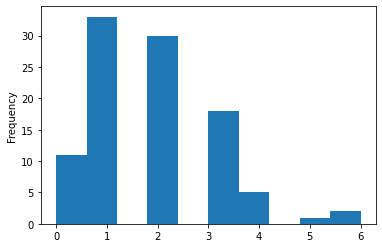

In [28]:
# generate 100 random numbers from a Poisson distribution with lambda = 2
# For example, if incoming customer service calls average 2 per minute, this code will simulate 100 minutes, returning the number of calls in each of those 100 minutes.

sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

### Exponential Distribution

Using the same parameter lambda that we used in the Poisson distribution, we can also
model the distribution of the time between events: time between visits to a
website or between cars arriving at a toll plaza.

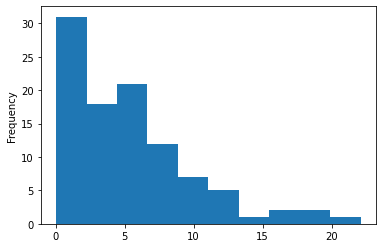

In [29]:
# generate 100 random numbers from an exponential distribution where the mean number of events per time period is 2. 
# So we could use it to simulate 100 intervals, in minutes, between service calls, where the average rate of incoming calls is 0.2 per minute.

sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

A key assumption in any simulation study for either the Poisson or exponential
distribution is that the rate, lambda, remains constant over the period being considered.
This is rarely reasonable in a global sense; for example, traffic on roads or data
networks varies by time of day and day of week. However, the time periods, or
areas of space, can usually be divided into segments that are sufficiently
homogeneous so that analysis or simulation within those periods is valid.

### Estimating the failure rate

In many applications, the event rate, , is known or can be estimated from prior
data. However, for rare events, this is not necessarily so. Aircraft engine failure,
for example, is sufficiently rare (thankfully) that, for a given engine type, there
may be little data on which to base an estimate of time between failures. With no
data at all, there is little basis on which to estimate an event rate. However, you
can make some guesses: if no events have been seen after 20 hours, you can be
pretty sure that the rate is not 1 per hour. Via simulation, or direct calculation of
probabilities, you can assess different hypothetical event rates and estimate
threshold values below which the rate is very unlikely to fall. If there is some data
but not enough to provide a precise, reliable estimate of the rate, a goodness-of-fit
test (see “Chi-Square Test”) can be applied to various rates to determine how
well they fit the observed data.

### Weibull Distribution

In many cases, the event rate does not remain constant over time. If the period
over which it changes is much longer than the typical interval between events,
there is no problem; you just subdivide the analysis into the segments where rates
are relatively constant, as mentioned before. If, however, the event rate changes
over the time of the interval, the exponential (or Poisson) distributions are no
longer useful. This is likely to be the case in mechanical failure — the risk of
failure increases as time goes by. The Weibull distribution is an extension of the
exponential distribution, in which the event rate is allowed to change, as specified
by a shape parameter, beta. If beta> 1, the probability of an event increases over
time, if beta < 1, it decreases. Because the Weibull distribution is used with time-to-failure
analysis instead of event rate, the second parameter is expressed in terms
of characteristic life, rather than in terms of the rate of events per interval. The
symbol used is the Greek letter eta. It is also called the scale parameter.
With the Weibull, the estimation task now includes estimation of both parameters, beta
and eta. Software is used to model the data and yield an estimate of the bestfitting
Weibull distribution.

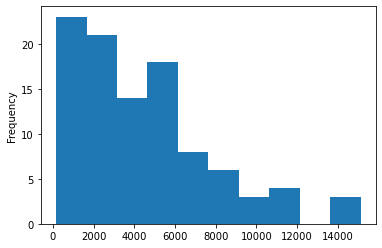

In [31]:
# generate 100 random numbers (lifetimes) from a Weibull distribution with shape of 1.5 and characteristic life of 5,000

sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()

Key Ideas

For events that occur at a constant rate, the number of events per unit of time or space can be
modeled as a Poisson distribution.  
In this scenario, you can also model the time or distance between one event and the next as an
exponential distribution.  
A changing event rate over time (e.g., an increasing probability of device failure) can be modeled
with the Weibull distribution.  

## Summary

In the era of big data, the principles of random sampling remain important when
accurate estimates are needed. Random selection of data can reduce bias and
yield a higher quality data set than would result from just using the conveniently
available data. Knowledge of various sampling and data generating distributions
allows us to quantify potential errors in an estimate that might be due to random
variation. At the same time, the bootstrap (sampling with replacement from an
observed data set) is an attractive “one size fits all” method to determine possible
error in sample estimates.

## Appendix: Sampling with replacement or without replacement

Sampling with replacement:

Consider a population of potato sacks, each of which has either 12, 13, 14, 15, 16, 17, or 18 potatoes, and all the values are equally likely. Suppose that, in this population, there is exactly one sack with each number. So the whole population has seven sacks. If I sample two with replacement, then I first pick one (say 14). I had a 1/7 probability of choosing that one. Then I replace it. Then I pick another. Every one of them still has 1/7 probability of being chosen. And there are exactly 49 different possibilities here (assuming we distinguish between the first and second.) They are: (12,12), (12,13), (12, 14), (12,15), (12,16), (12,17), (12,18), (13,12), (13,13), (13,14), etc.

Sampling without replacement:

Consider the same population of potato sacks, each of which has either 12, 13, 14, 15, 16, 17, or 18 potatoes, and all the values are equally likely. Suppose that, in this population, there is exactly one sack with each number. So the whole population has seven sacks. If I sample two without replacement, then I first pick one (say 14). I had a 1/7 probability of choosing that one. Then I pick another. At this point, there are only six possibilities: 12, 13, 15, 16, 17, and 18. So there are only 42 different possibilities here (again assuming that we distinguish between the first and the second.) They are: (12,13), (12,14), (12,15), (12,16), (12,17), (12,18), (13,12), (13,14), (13,15), etc.

What's the Difference?

When we sample with replacement, the two sample values are independent. Practically, this means that what we get on the first one doesn't affect what we get on the second. Mathematically, this means that the covariance between the two is zero.

In sampling without replacement, the two sample values aren't independent. Practically, this means that what we got on the for the first one affects what we can get for the second one. Mathematically, this means that the covariance between the two isn't zero. 